#### Packages


In [1]:
# For data manipulation
import pandas as pd
import numpy as np
import random as rnd
import re
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns


#### Training and Test Sets

In [2]:
#loading data
trainSet = pd.read_csv('train.csv', header=0, sep=',', quotechar='"')
testSet=  pd.read_csv('test.csv', header=0, sep=',', quotechar='"')

In [3]:
#trainSet.head(10)

In [4]:
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


#### Extracting Titles

In [5]:
#Extracting titles from the name column
trainSet['Title']=[re.sub('(.*, )|(\\..*)', '', x) for x in trainSet["Name"]]
testSet['Title']=[re.sub('(.*, )|(\\..*)', '', x) for x in testSet["Name"]]

#Displays unique titles
uniqueTitles=trainSet['Title'].unique()
#print('Titles:',uniqueTitles)

#Extra Most repeated titles and rare titles
count=trainSet['Title'].value_counts()
print(count)
repeated=count[count>=40]
rare=count[count<40]
repeatedTitles=repeated.index.tolist()
rareTitles=rare.index.tolist()
#print('RareTitles:',rareTitles)
#print('Repeated',repeatedTitles)


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
the Countess      1
Sir               1
Don               1
Ms                1
Mme               1
Jonkheer          1
Lady              1
Name: Title, dtype: int64


In [6]:
count.tolist()
uniqueTitles.tolist()
titles=dict(zip(uniqueTitles,count))
sex=trainSet['Sex'].tolist()
val=trainSet['Title'].tolist()
gender=dict(zip(val,sex))
table=pd.DataFrame({'Sex':['male','female']})
x=0

for i in uniqueTitles:
    table[i[:]]=count[x]
    x+=1
table

,Sex,Mr,Mrs,Miss,Master,Don,Rev,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,the Countess,Jonkheer
0,male,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1
1,female,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


#### Replacing Titles

In [7]:
#Replacing titles 
trainSet.loc[trainSet.Title=='Mlle','Title']='Mlle'
trainSet.loc[trainSet.Title=='Ms','Title']='Miss'
trainSet.loc[trainSet.Title=='Mme','Title']='Mrs'
trainSet.loc[trainSet.Title.isin(rareTitles),'Title']='Rare Title'

testSet.loc[testSet.Title=='Mlle','Title']='Mlle'
testSet.loc[testSet.Title=='Ms','Title']='Miss'
testSet.loc[testSet.Title=='Mme','Title']='Mrs'
testSet.loc[testSet.Title.isin(rareTitles),'Title']='Rare Title'

#Checks whether values got updated
'Rare Title' in trainSet['Title'].values
#trainSet

True

#### Extracting Surnames

In [8]:
#Making column for surnames
surname = trainSet["Name"].str.split(",")
trainSet["Surname"] = [x[0] for x in surname]
surname = testSet["Name"].str.split(",")
testSet["Surname"] = [x[0] for x in surname]


#### Family and Family Size


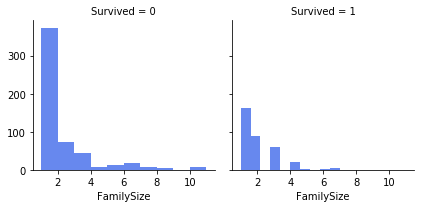

In [48]:
#Family size
trainSet['FamilySize'] = trainSet['SibSp'] + trainSet['Parch']+1
testSet['FamilySize'] = testSet['SibSp'] + testSet['Parch']+1
#trainSet
with sns.color_palette("coolwarm"):
    g = sns.FacetGrid(trainSet, col='Survived')
    g.map(plt.hist, 'FamilySize', bins=10)

In [10]:
# Discretize family size
trainSet['Family']=''
trainSet.loc[trainSet.FamilySize==1,'Family']='singleton'
trainSet.loc[(trainSet.FamilySize>1)&(trainSet.FamilySize<5),'Family']='small'
trainSet.loc[(trainSet.FamilySize>4),'Family']='large'
testSet['Family']=''
testSet.loc[testSet.FamilySize==1,'Family']='singleton'
testSet.loc[(testSet.FamilySize>1)&(testSet.FamilySize<5),'Family']='small'
testSet.loc[(testSet.FamilySize>4),'Family']='large'
#testSet


#### Filling missing values

In [11]:
#Filling missing values in fare column
testSet['Age'].fillna(testSet["Fare"].median(), inplace=True)

In [12]:
#inserting missing values in embarked column
trainSet["Embarked"] = trainSet["Embarked"].fillna('C')
testSet["Embarked"] = testSet["Embarked"].fillna('C')


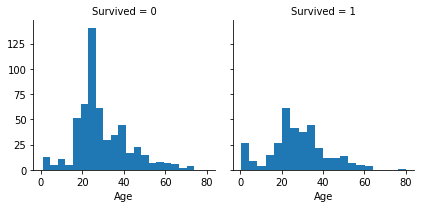

In [21]:
#Age imputing taken from here
#https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/grouping-data?ex=11

by_sex_class=trainSet.groupby(['Sex', 'Pclass'])
by_sex=testSet.groupby(['Sex', 'Pclass'])

def impute_median(series):
    return series.fillna(series.median())
trainSet['Age'] = by_sex_class['Age'].transform(impute_median)
testSet['Age'] = by_sex['Age'].transform(impute_median)

g = sns.FacetGrid(trainSet, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Dropping Columns


In [14]:
#Dropping columns
trainSet = trainSet.drop(['PassengerId','Name','Ticket','Cabin','Surname'], axis=1)
testSet = testSet.drop(['PassengerId','Name','Ticket','Cabin','Surname'], axis=1)

#### Creating Columns Child and Mother

In [15]:
#child column
trainSet['Child']=''
trainSet.loc[trainSet.Age>=18,'Child']='Adult'
trainSet.loc[trainSet.Age<18,'Child']='Child'

testSet['Child']=''
testSet.loc[testSet.Age>=18,'Child']='Adult'
testSet.loc[testSet.Age<18,'Child']='Child'

#Mother column

trainSet['Mother']='Not Mother'
trainSet.loc[(trainSet["Sex"] == 'female') & (trainSet["Parch"] > 0) & (trainSet["Age"] > 18) & (trainSet["Title"] != 'Miss'),'Mother'] = 'Mother'

testSet['Mother']='Not Mother'
testSet.loc[(testSet["Sex"] == 'female') & (testSet["Parch"] > 0) & (testSet["Age"] > 18) & (testSet["Title"] != 'Miss'),'Mother'] = 'Mother'


#### Checking again for missing data 

In [16]:
#Checking if any more data is missing
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null object
FamilySize    891 non-null int64
Family        891 non-null object
Child         891 non-null object
Mother        891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 69.6+ KB


In [37]:
encodeTestSet = pd.get_dummies(testSet)
encodeTrainSet = pd.get_dummies(trainSet)
Survive=encodeTrainSet.pop('Survived')

#X_test=pd.get_dummies(testSet)
#X_train=pd.get_dummies(trainSet)


In [38]:
#importing libraries for different classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC


X_train, X_test, y_train, y_test = train_test_split(
    encodeTrainSet, Survive, test_size=0.33, random_state=42)



classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]

#result of classifiers in precision, accuracy, recall, fmeasure
for clf in classifiers:
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_pred, y_test)
    precision = precision_score(Y_pred, y_test)
    recall = recall_score(Y_pred, y_test)
    f_measure = f1_score(Y_pred, y_test)
    print('On',clf.__class__.__name__,'Accuracy is: ',accuracy*100,'%')
    print('On',clf.__class__.__name__,'Precision is: ',precision*100,'%')
    print('On',clf.__class__.__name__,'Recall is: ',recall*100,'%')
    print('On',clf.__class__.__name__,'F_Measure is: ',f_measure*100,'%')


On KNeighborsClassifier Accuracy is:  73.89830508474576 %
On KNeighborsClassifier Precision is:  61.66666666666667 %
On KNeighborsClassifier Recall is:  70.47619047619048 %
On KNeighborsClassifier F_Measure is:  65.77777777777779 %


f:\softwares\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
f:\softwares\python\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
f:\softwares\python\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
f:\softwares\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warni

On SVC Accuracy is:  59.32203389830508 %
On SVC Precision is:  0.0 %
On SVC Recall is:  0.0 %
On SVC F_Measure is:  0.0 %
On NuSVC Accuracy is:  76.94915254237287 %
On NuSVC Precision is:  65.83333333333333 %
On NuSVC Recall is:  74.52830188679245 %
On NuSVC F_Measure is:  69.91150442477874 %
On DecisionTreeClassifier Accuracy is:  75.2542372881356 %
On DecisionTreeClassifier Precision is:  66.66666666666666 %
On DecisionTreeClassifier Recall is:  70.79646017699115 %
On DecisionTreeClassifier F_Measure is:  68.6695278969957 %


f:\softwares\python\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
f:\softwares\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


On RandomForestClassifier Accuracy is:  79.66101694915254 %
On RandomForestClassifier Precision is:  71.66666666666667 %
On RandomForestClassifier Recall is:  76.78571428571429 %
On RandomForestClassifier F_Measure is:  74.13793103448276 %
On LogisticRegression Accuracy is:  83.38983050847457 %
On LogisticRegression Precision is:  76.66666666666667 %
On LogisticRegression Recall is:  81.41592920353983 %
On LogisticRegression F_Measure is:  78.96995708154508 %
On AdaBoostClassifier Accuracy is:  81.35593220338984 %
On AdaBoostClassifier Precision is:  75.83333333333333 %
On AdaBoostClassifier Recall is:  77.77777777777779 %
On AdaBoostClassifier F_Measure is:  76.79324894514768 %
On GradientBoostingClassifier Accuracy is:  82.71186440677965 %
On GradientBoostingClassifier Precision is:  71.66666666666667 %
On GradientBoostingClassifier Recall is:  83.49514563106796 %
On GradientBoostingClassifier F_Measure is:  77.13004484304932 %
On GaussianNB Accuracy is:  82.37288135593221 %
On Gauss

f:\softwares\python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
f:\softwares\python\lib\site-packages\sklearn\discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [19]:
'''
References:

For extracting titles:
https://stackoverflow.com/questions/38773379/simplest-python-equivalent-to-rs-gsub

For plots and some data manipulation:
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

For age imputing:
https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/grouping-data?ex=11

Note:Most of the data manipulation techniques were learned in Datascience course so some techniques might be similar.
'''



'\nReferences:\n\nFor extracting titles:\nhttps://stackoverflow.com/questions/38773379/simplest-python-equivalent-to-rs-gsub\n\nFor plots and some data manipulation:\nhttps://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8\n\nFor age imputing:\nhttps://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/grouping-data?ex=11\n\nNote:Most of the data manipulation techniques were learned in Datascience course so some techniques might be similar.\n'